In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as s
import scipy.optimize as opt
import seaborn as sns

In [57]:
from scipy.stats import bernoulli
import random

In [58]:
training_data = pd.DataFrame(data={"x":np.random.binomial(n=1,p=0.5,size=1000)})

In [59]:
training_data

,x
0,1
1,1
2,0
3,1
4,1
...,...
995,1
996,0
997,1
998,0


(array([496.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0., 504.]),
 array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
        0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
        0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64,
        0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86,
        0.88, 0.9 , 0.92, 0.94, 0.96, 0.98, 1.  ]),
 <BarContainer object of 50 artists>)

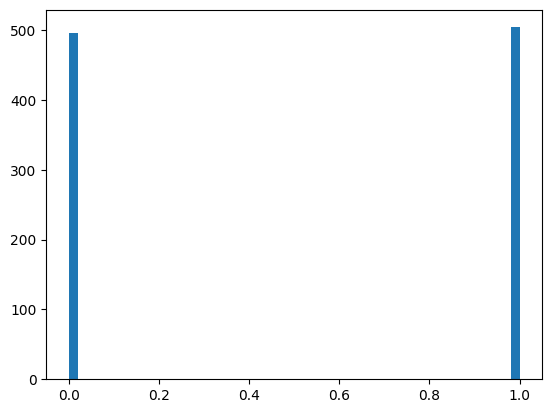

In [60]:
plt.hist(training_data,bins=50)

In [65]:
def bernaulli_nll(p):

    log_pdf = s.bernoulli.logpmf(training_data,p)
    return -np.mean(log_pdf)
    

In [68]:
def del_by_del_bernaulli_nll(p):

    del_by_del_p =  np.mean((p_initial-training_data)/(p_initial*(1-p_initial)))

    return del_by_del_p

In [69]:
epsilon = 10**(-2)
epoch_counter = 0
p_initial = random.uniform(0.000000000000001,1)
tol = 10**(-6)

while True:

    initial_gradients = del_by_del_bernaulli_nll(p_initial)

    p_final = p_initial - (epsilon * initial_gradients)

    nll_initial_value = bernaulli_nll(p_initial)
    nll_final_value = bernaulli_nll(p_final)

    if abs(nll_initial_value - nll_final_value) < tol:
        break

    epoch_counter += 1
    p_initial = p_final

    print("Epoch # {}, NLL Value = {}".format(epoch_counter,nll_initial_value))

Epoch # 1, NLL Value = 0.707038705633026
Epoch # 2, NLL Value = 0.7058984392072468
Epoch # 3, NLL Value = 0.7048551362125283
Epoch # 4, NLL Value = 0.7038999874252112
Epoch # 5, NLL Value = 0.7030250732524135
Epoch # 6, NLL Value = 0.7022232598156072
Epoch # 7, NLL Value = 0.7014881093530926
Epoch # 8, NLL Value = 0.7008138026352194
Epoch # 9, NLL Value = 0.7001950715096901
Epoch # 10, NLL Value = 0.6996271400311729
Epoch # 11, NLL Value = 0.6991056728991364
Epoch # 12, NLL Value = 0.6986267301449698
Epoch # 13, NLL Value = 0.6981867271853301
Epoch # 14, NLL Value = 0.6977823995018322
Epoch # 15, NLL Value = 0.6974107713243668
Epoch # 16, NLL Value = 0.6970691277916976
Epoch # 17, NLL Value = 0.696754990142568
Epoch # 18, NLL Value = 0.6964660935566298
Epoch # 19, NLL Value = 0.6962003673195329
Epoch # 20, NLL Value = 0.6959559170326025
Epoch # 21, NLL Value = 0.6957310086262178
Epoch # 22, NLL Value = 0.6955240539686587
Epoch # 23, NLL Value = 0.6953335978898035
Epoch # 24, NLL Value 

In [71]:
p_final


np.float64(0.5063331783665993)